# The NBA 3-Pointer's Staggering Rise  

### by Rish Poola

#### Today's NBA game is, in many ways, unrecognizable from its mid-90s self. One of the most prominent shifts has been the rise of the 3-pointer. It's no coincidence that the 3's rise has happened hand-in-hand with the move toward advanced analytics, maximizing offensive efficiency, and the use of sophisticated in-game camera technology. The trend has been most embraced and emblemized by the Houston Rockets, their shooting guard James Harden and GM Daryl Morey. Supporters say the 3 point threat has made the game more exciting by spacing the floor and spurring positionless basketball. Critics say it's dulled the game by reducing shot diversity. I wanted to rub the stats between my fingers and see for myself how the 3-pointer has evolved. I was astonished at what I found.  

#### The purpose of this analysis is to explore and visualize the evolution of the NBA 3-pointer. The dataset, downloaded from Kaggle (https://www.kaggle.com/drgilermo/nba-players-stats?select=Seasons_Stats.csv) and originally scraped from Basketball-Reference (https://www.basketball-reference.com/), includes season stats for every NBA player from 1950 to 2017. I focus on observations from 1980, the year the 3 pointer was introduced, to 2017 and on the variables Player, Position, 3PAr, 3P, 3PA, 3P%, Points, PER, and Team, all of which I've detailed below. My analysis includes transforming, cleaning, and subsetting dataframes, grouping data using groupby, setting and styling line, box, density, and multidimensional scatter plots and heatmaps using seaborn, and making exploratory statistical observations by year (time series), position, and team. 

In [147]:
# Import relevant packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [148]:
# The code was removed by Watson Studio for sharing.

In [149]:
# Read file as pandas dataframe
nba = pd.read_csv(body)

# Set display option so columns aren't cut off
pd.set_option("display.max_columns",100)


# Glance at first few rows and all columns. Notice that the data starts in the year 1950.
nba.head() 

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,blanl,OWS,DWS,WS,WS/48,blank2,OBPM,DBPM,BPM,VORP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,0.368,NaN,0.467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.1,3.6,3.5,NaN,NaN,NaN,NaN,NaN,NaN,144.0,516.0,0.279,NaN,NaN,NaN,144.0,516.0,0.279,0.279,170.0,241.0,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,0.435,NaN,0.387,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.6,0.6,2.2,NaN,NaN,NaN,NaN,NaN,NaN,102.0,274.0,0.372,NaN,NaN,NaN,102.0,274.0,0.372,0.372,75.0,106.0,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,0.394,NaN,0.259,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.9,2.8,3.6,NaN,NaN,NaN,NaN,NaN,NaN,174.0,499.0,0.349,NaN,NaN,NaN,174.0,499.0,0.349,0.349,90.0,129.0,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,0.312,NaN,0.395,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.5,-0.1,-0.6,NaN,NaN,NaN,NaN,NaN,NaN,22.0,86.0,0.256,NaN,NaN,NaN,22.0,86.0,0.256,0.256,19.0,34.0,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,0.308,NaN,0.378,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.5,-0.1,-0.6,NaN,NaN,NaN,NaN,NaN,NaN,21.0,82.0,0.256,NaN,NaN,NaN,21.0,82.0,0.256,0.256,17.0,31.0,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0


In [150]:
# Notice that the years are floats. Let's convert them to integers using the astype() function. 

nba["Year"]=nba["Year"].values.astype(int)

# Take another look at the first few rows. Perfect, it looks like years are now integers. 
nba.head()

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,blanl,OWS,DWS,WS,WS/48,blank2,OBPM,DBPM,BPM,VORP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,0,1950,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,0.368,NaN,0.467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.1,3.6,3.5,NaN,NaN,NaN,NaN,NaN,NaN,144.0,516.0,0.279,NaN,NaN,NaN,144.0,516.0,0.279,0.279,170.0,241.0,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1,1950,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,0.435,NaN,0.387,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.6,0.6,2.2,NaN,NaN,NaN,NaN,NaN,NaN,102.0,274.0,0.372,NaN,NaN,NaN,102.0,274.0,0.372,0.372,75.0,106.0,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,2,1950,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,0.394,NaN,0.259,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.9,2.8,3.6,NaN,NaN,NaN,NaN,NaN,NaN,174.0,499.0,0.349,NaN,NaN,NaN,174.0,499.0,0.349,0.349,90.0,129.0,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,3,1950,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,0.312,NaN,0.395,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.5,-0.1,-0.6,NaN,NaN,NaN,NaN,NaN,NaN,22.0,86.0,0.256,NaN,NaN,NaN,22.0,86.0,0.256,0.256,19.0,34.0,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,4,1950,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,0.308,NaN,0.378,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.5,-0.1,-0.6,NaN,NaN,NaN,NaN,NaN,NaN,21.0,82.0,0.256,NaN,NaN,NaN,21.0,82.0,0.256,0.256,17.0,31.0,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0


In [151]:
# Glance at last few rows. Notice that the data ends in the year 2017. 

nba.tail()

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,blanl,OWS,DWS,WS,WS/48,blank2,OBPM,DBPM,BPM,VORP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
24686,24686,2017,Cody Zeller,PF,24.0,CHO,62.0,58.0,1725.0,16.7,0.604,0.002,0.442,8.6,17.3,12.9,9.1,1.8,3.0,10.9,15.5,NaN,3.4,2.2,5.6,0.157,NaN,-0.2,2.3,2.1,1.8,253.0,443.0,0.571,0.0,1.0,0.000,253.0,442.0,0.572,0.571,133.0,196.0,0.679,135.0,270.0,405.0,99.0,62.0,58.0,65.0,189.0,639.0
24687,24687,2017,Tyler Zeller,C,27.0,BOS,51.0,5.0,525.0,13.0,0.508,0.006,0.247,9.2,17.0,13.2,12.2,0.7,3.3,10.2,16.5,NaN,0.5,0.6,1.0,0.094,NaN,-3.2,0.8,-2.5,-0.1,78.0,158.0,0.494,0.0,1.0,0.000,78.0,157.0,0.497,0.494,22.0,39.0,0.564,43.0,81.0,124.0,42.0,7.0,21.0,20.0,61.0,178.0
24688,24688,2017,Stephen Zimmerman,C,20.0,ORL,19.0,0.0,108.0,7.3,0.346,0.000,0.161,10.8,24.9,17.6,5.3,0.9,3.7,8.3,14.8,NaN,-0.1,0.1,0.0,-0.005,NaN,-7.8,0.4,-7.3,-0.1,10.0,31.0,0.323,0.0,0.0,NaN,10.0,31.0,0.323,0.323,3.0,5.0,0.600,11.0,24.0,35.0,4.0,2.0,5.0,3.0,17.0,23.0
24689,24689,2017,Paul Zipser,SF,22.0,CHI,44.0,18.0,843.0,6.9,0.503,0.448,0.181,1.9,14.2,8.0,6.1,0.9,1.5,14.4,14.4,NaN,-0.3,0.8,0.5,0.030,NaN,-3.6,-0.1,-3.7,-0.4,88.0,221.0,0.398,33.0,99.0,0.333,55.0,122.0,0.451,0.473,31.0,40.0,0.775,15.0,110.0,125.0,36.0,15.0,16.0,40.0,78.0,240.0
24690,24690,2017,Ivica Zubac,C,19.0,LAL,38.0,11.0,609.0,17.0,0.547,0.013,0.206,7.1,21.9,14.3,8.1,1.1,4.4,10.4,20.3,NaN,0.6,0.5,1.1,0.086,NaN,-2.7,0.3,-2.5,-0.1,126.0,238.0,0.529,0.0,3.0,0.000,126.0,235.0,0.536,0.529,32.0,49.0,0.653,41.0,118.0,159.0,30.0,14.0,33.0,30.0,66.0,284.0


In [152]:
# Check all the column headings

nba.columns

Index(['Unnamed: 0', 'Year', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP',
       'PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%',
       'BLK%', 'TOV%', 'USG%', 'blanl', 'OWS', 'DWS', 'WS', 'WS/48', 'blank2',
       'OBPM', 'DBPM', 'BPM', 'VORP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%',
       '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB',
       'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')

In [153]:
# Check the dimensions of the dataframe. It contains 24,691 rows and 53 columns. 

nba.shape

(24691, 53)

#### Now that we've gotten a feel for the dataset, let's reshape it to what we need. Keep in mind that this is per season data with the year referring to the season starting the prior year. For example, 1980 refers to the 1979-1980 season, 2017 refers to the 2016-2017 season, and so on. Since the NBA 3 point shot was introduced in the 1979-1980 season, we will focus on observations from 1980 to 2017. I will focus on the following variables:

#### 3PAr: three point attempt rate, which is the ratio of 3 point attempts to field goal attempts (3PA/FGA)
#### 3P: three pointers made
#### 3PA: three pointers attempted
#### 3P%: percentage of three pointers made (3P/3PA)
#### PTS: total points
#### PER: player efficiency ratio (here's how it's calculated: https://www.basketball-reference.com/about/per.html)
#### Year
#### Player
#### Pos: position
#### Tm: Team

In [154]:
# Subset observations from 1980 to 2017 and variables of interest. Exclude missing values using the dropna() function. 

nba1 = nba.loc[(nba.Year >= 1980) & (nba.Year <= 2020), ["Year", "Player", "Pos", "3PAr","3P","3PA", "3P%", "PTS", "PER", "Tm"]].dropna()

# Glance at the first few rows of our new dataframe
nba1.head() 

,Year,Player,Pos,3PAr,3P,3PA,3P%,PTS,PER,Tm
5727,1980,Kareem Abdul-Jabbar*,C,0.001,0.0,1.0,0.000,2034.0,25.3,LAL
5728,1980,Tom Abernethy,PF,0.003,0.0,1.0,0.000,362.0,11.0,GSW
5729,1980,Alvan Adams,C,0.002,0.0,2.0,0.000,1118.0,19.2,PHO
5730,1980,Tiny Archibald*,PG,0.023,4.0,18.0,0.222,1131.0,15.3,BOS
5732,1980,Gus Bailey,SG,0.029,1.0,1.0,1.000,38.0,9.3,WSB


In [155]:
# Check the dimensions of our new dataframe. As expected, it is smaller with 15,416 rows and 10 columns. 

nba1.shape

(15416, 10)

In [156]:
# Let's check the data types in the dataframe, this may come in useful later. Notice we've changed the years to integers.  

nba1.dtypes

Year        int64
Player     object
Pos        object
3PAr      float64
3P        float64
3PA       float64
3P%       float64
PTS       float64
PER       float64
Tm         object
dtype: object

In [157]:
# We're going to be using seaborn for plots. Let's set the style to "darkgrid"

sns.set_style("darkgrid")

#### A lineplot is useful for a time series analysis. Plot maximum 3PA by year. Notice the significant rise in maximum 3PA per season from roughly 200 in 1980 to around 900 in 2017. The high peak in 2016 belongs to Steph Curry. 

Text(0.5, 1.0, 'Maximum 3 Point Attempts from 1980 to 2017')

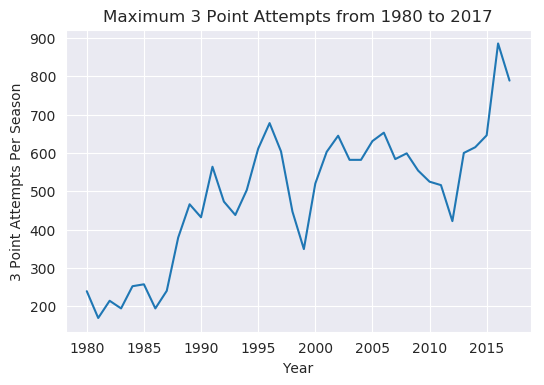

In [205]:
# Lineplot of max 3PA by year. Remember to set figure size before calling the sns plot. 

plt.figure(dpi=100)
sns.lineplot(x="Year", y="3PA", estimator = np.max, ci = None, data=nba1)
plt.ylabel("3 Point Attempts Per Season")
plt.title("Maximum 3 Point Attempts from 1980 to 2017")

#### Let's take a look at how maximum 3PA by year looks by position by plotting a lineplot. The plot is crowded and tough to read, but what's clear is that the rise in maximum 3PA is most significant for PGs, SGs, SFs, and PFs. 

Text(0.5, 1.0, 'Maximum 3 Point Attempts by Position from 1980 to 2017')

<Figure size 600x400 with 0 Axes>

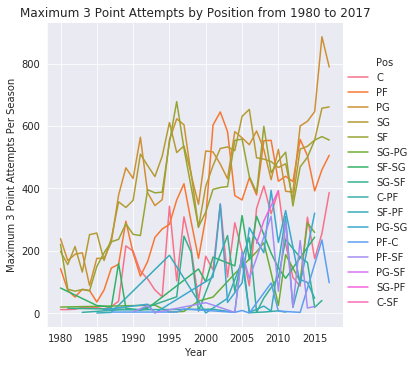

In [204]:
# Lineplot of max 3PA per season by year and by position.

plt.figure(dpi=100)
sns.relplot(x="Year", y="3PA", estimator = np.max, hue="Pos", kind="line",ci=None,data=nba1)
plt.ylabel("Maximum 3 Point Attempts Per Season")
plt.title("Maximum 3 Point Attempts by Position from 1980 to 2017")

#### Let's look at median 3PA by year. I've chosen median rather than mean as it's less affected by outliers. Notice the significant rise in median 3PA per season from <10 in 1980 to nearly 90 in 2017.

Text(0.5, 1.0, 'Median 3 Point Attempts from 1980 to 2017')

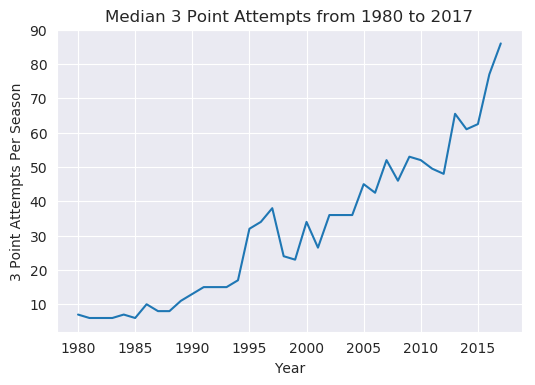

In [203]:
# Lineplot of median 3PA per season by year. 

plt.figure(dpi=100)
sns.lineplot(x="Year", y="3PA", estimator = np.median, ci = None, data=nba1)
plt.ylabel("3 Point Attempts Per Season")
plt.title("Median 3 Point Attempts from 1980 to 2017")

#### Box plots are useful for analyzing spread and spotting outliers in a time series. They can be even more revealing than line plots. Notice the steady uptick in median 3PA by season from 1980 to 2017. Even more remarkable is the significant widening of the spread and increase in higher-end outliers. Note the single high-end outlier in 2016 is Steph Curry. 

Text(0.5, 1.0, 'Spread of 3 Point Attempts from 1980-2017')

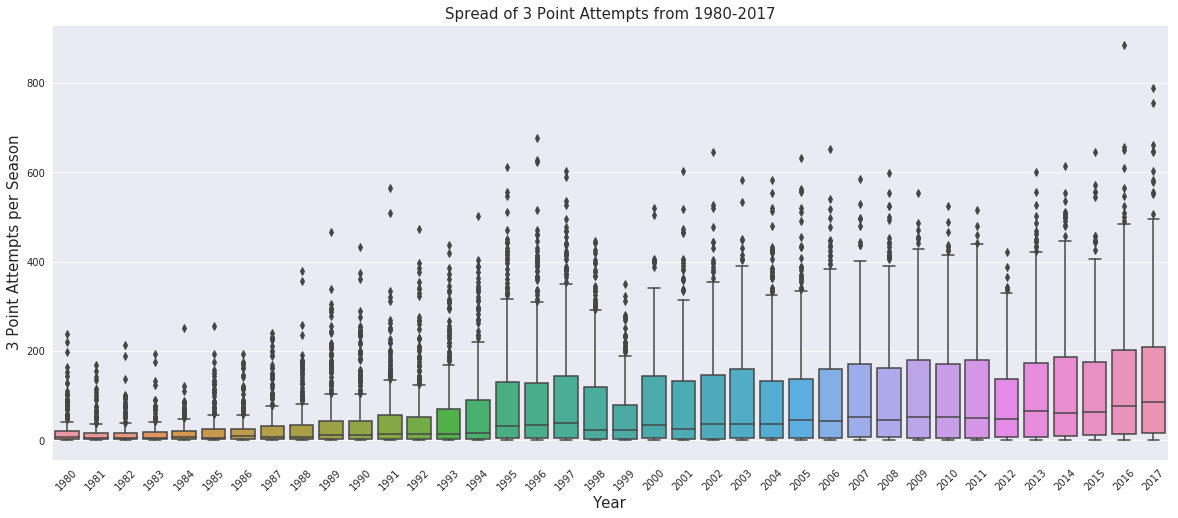

In [202]:
# Box plots of 3PA by year. Make sure to set figure size before calling the sns plot. 
# Also make sure to roatate the x axis labels using the set_xticklabels and get_xticklabels() functions otherwise they will overlap. 

plt.figure(figsize=(20, 8))
g = sns.boxplot(x="Year", y="3PA", data=nba1)
g.set_xticklabels(g.get_xticklabels(),rotation=45)
plt.ylabel("3 Point Attempts per Season", fontsize=15)
plt.xlabel("Year", fontsize=15)
plt.title("Spread of 3 Point Attempts from 1980-2017", fontsize=15)

#### Let's look at the summary statistics for 3PA by year in table form. Notice how strong the impact of outliers is in 2017, where the median 3PA is 86, while the mean is 133.

In [228]:
# Group data by year using the groupby function. View summary statistics using describe() function. 

nba2 = nba1.groupby("Year")
nba2["3PA"].describe()

,count,mean,std,min,25%,50%,75%,max
Year,,,,,,,,
1980,273.0,20.227106,34.909964,1.0,3.00,7.0,20.00,239.0
1981,274.0,15.186131,25.742278,1.0,2.00,6.0,16.75,169.0
1982,292.0,15.941781,26.352749,1.0,2.00,6.0,17.00,214.0
1983,314.0,14.624204,23.445515,1.0,2.00,6.0,18.00,194.0
1984,259.0,17.756757,26.102932,1.0,3.00,7.0,21.50,252.0
1985,281.0,21.380783,35.856672,1.0,2.00,6.0,25.00,257.0
1986,297.0,22.481481,34.070780,1.0,2.00,10.0,25.00,194.0
1987,303.0,30.287129,49.005136,1.0,2.00,8.0,32.50,240.0
1988,341.0,31.480938,52.740350,1.0,2.00,8.0,35.00,379.0


#### Even more interesting than 3PA is the 3 point attempt rate, or 3PAr. 3PAr is the proportion of FG attempts that are 3P attempts, or simply 3PA/FGA. Heres' a look at median 3PAr by year. Notice the significant rise in median 3PAr per season from 2% in 1980 to 35% in 2017. Also, notice the uptick from 1995 to 1998. That's when the NBA shortened the 3 point line from 23ft 9in (7.24m) to 22 ft (6.71m). The NBA reverted back to the orignal three point line in 1998. Notice the steady rise in median 3PAr from 2001 to 2017. 

Text(0.5, 1.0, 'Median 3 Point Attempt Rate from 1980 to 2017')

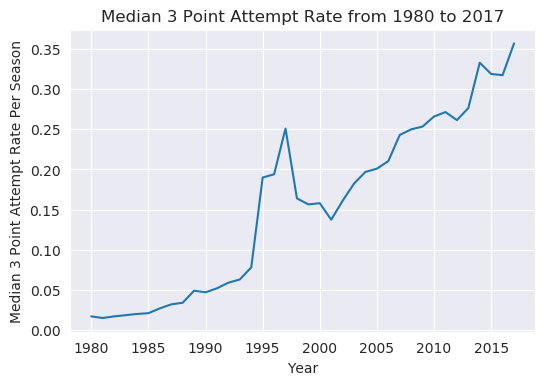

In [201]:
# Line plot of median 3PAr by year. 

plt.figure(dpi=100)
sns.lineplot(x="Year", y="3PAr", estimator = np.median, ci = None, data=nba1)
plt.ylabel("Median 3 Point Attempt Rate Per Season")
plt.title("Median 3 Point Attempt Rate from 1980 to 2017")

#### Let's look at summary statistis for 3PAr in table form. 

In [229]:
# Reminder, I already grouped data by year earlier and saved the dataframe as nba2. 

nba2["3PAr"].describe()

,count,mean,std,min,25%,50%,75%,max
Year,,,,,,,,
1980,273.0,0.036645,0.051901,0.001,0.00700,0.0170,0.04300,0.389
1981,274.0,0.035139,0.065665,0.001,0.00600,0.0150,0.03300,0.586
1982,292.0,0.035397,0.057132,0.001,0.00675,0.0170,0.03900,0.560
1983,314.0,0.032245,0.043371,0.001,0.00700,0.0185,0.04075,0.380
1984,259.0,0.040093,0.055556,0.001,0.00700,0.0200,0.05350,0.500
1985,281.0,0.044160,0.058977,0.001,0.00800,0.0210,0.05500,0.429
1986,297.0,0.051384,0.066115,0.001,0.00900,0.0270,0.06200,0.452
1987,303.0,0.065036,0.088135,0.001,0.00750,0.0320,0.08700,0.750
1988,341.0,0.083138,0.127555,0.001,0.00800,0.0340,0.09700,1.000


#### A density plot is a great way to look at the shape of a distribution and visualize spread. Here are density plots for 3PAr for 1980, 2000, and 2017. Notice how the shape of the distribution of 3PAr changed dramatically. In 1980, the 3PAr is tightly centered around a mean of 0.04. By 2017, it's spread widely around a mean of 0.35. For me, this is the most staggering visual of the rise of the NBA 3 pointer.

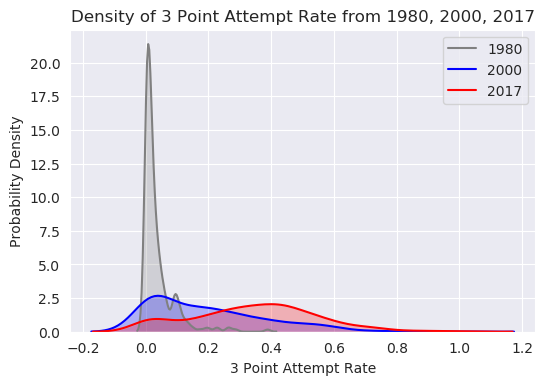

In [233]:
# Subset data into three dataframes, one for 1980, one for 2000, and one for 2017

nba3 = nba1.loc[nba1.Year == 1980.0,:]
nba4 = nba1.loc[nba1.Year == 2000.0,:]
nba5 = nba1.loc[nba1.Year == 2017.0,:]

# Remember to set size of the plot before calling the sns plot
plt.figure(dpi=100)     

# 3 Density plots side-by-side, each with color set. 
sns.kdeplot(nba3["3PAr"], shade=True, color="Gray")
sns.kdeplot(nba4["3PAr"], shade=True, color="Blue")
sns.kdeplot(nba5["3PAr"],shade=True, color="Red")
plt.xlabel("3 Point Attempt Rate")
plt.ylabel("Probability Density")
plt.title("Density of 3 Point Attempt Rate from 1980, 2000, 2017")

# Customize the legend labels using plt.legend() method. 
plt.legend(labels=["1980","2000","2017"])
plt.show()

#### Let's look at median 3P% made per season by year. Notice how median 3P% has barely budged since 1995, hovering around 33%.

Text(0.5, 1.0, 'Median 3 Point % from 1980 to 2017')

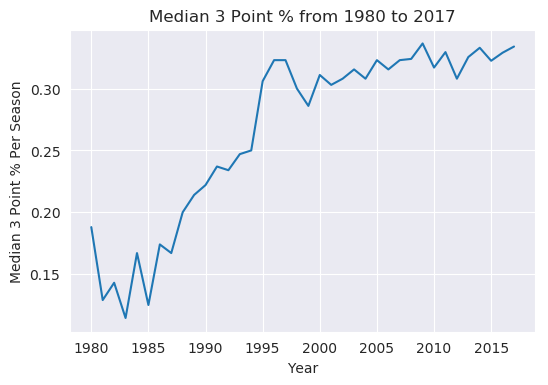

In [230]:
# Line plot of median 3P% by year. 

plt.figure(dpi=100)
sns.lineplot(x="Year", y="3P%", estimator = np.median, ci = None, data=nba1)
plt.ylabel("Median 3 Point % Per Season")
plt.title("Median 3 Point % from 1980 to 2017")

#### Let's also look at 3PAr by team.  Notice how the Houston Rockets with James Harden have the highest median 3PAr. 

In [169]:
# Gruop data by team using the groupby function for the year 2017. Generate summary statistics using describe(). 

nba6=nba1.loc[nba1.Year == 2017.0,:]
nba7=nba6.groupby("Tm")
nba7["3PAr"].describe()

,count,mean,std,min,25%,50%,75%,max
Tm,,,,,,,,
ATL,19.0,0.352579,0.148539,0.003,0.26800,0.3570,0.43200,0.646
BOS,15.0,0.350733,0.175160,0.006,0.27600,0.3780,0.46050,0.603
BRK,21.0,0.386190,0.145335,0.124,0.32400,0.3860,0.48400,0.625
CHI,17.0,0.381059,0.258527,0.003,0.20900,0.3990,0.54000,1.000
CHO,16.0,0.302562,0.158664,0.002,0.21275,0.3290,0.42150,0.503
CLE,18.0,0.424333,0.224057,0.007,0.26825,0.4050,0.61025,0.761
DAL,23.0,0.349609,0.180740,0.012,0.21650,0.4000,0.46600,0.674
DEN,16.0,0.354813,0.212093,0.006,0.21050,0.3685,0.45675,0.870
DET,13.0,0.328154,0.162629,0.008,0.25900,0.3550,0.42200,0.570


#### Box plots are a great way to visualize the spread of 3PAr by team. Notice that the Houston Rockets have the highest median and minimum 3PAr. Notice how wide the spread is for the Milwaukee Bucks, Chicago Bulls, and Cleveland Cavaliers and how tight the spread is for the Minnesota Timberwolves, Utah Jazz, Detroit Pistons, Brooklyn Nets, and Oklahoma City Thunder. 

Text(0.5, 1.0, 'Spread of 3 Point Attempt Rate by Team in 2017')

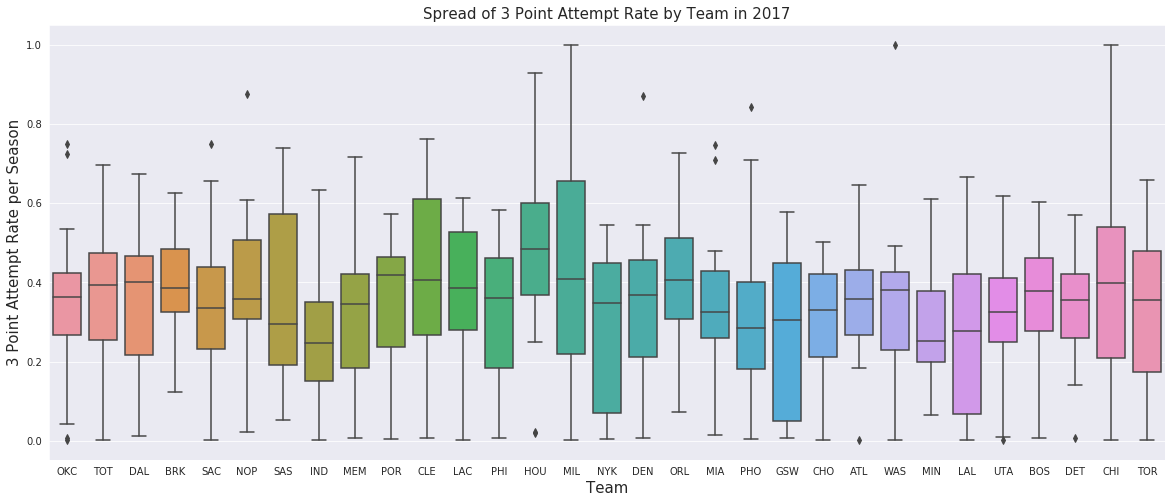

In [220]:
# Box plots 3PAr by team. Remember to set size of plot before calling sns plot. 

plt.figure(figsize=(20, 8))
sns.boxplot(x="Tm", y="3PAr", data=nba6)
plt.ylabel("3 Point Attempt Rate per Season", fontsize=15)
plt.xlabel("Team", fontsize=15)
plt.title("Spread of 3 Point Attempt Rate by Team in 2017", fontsize=15)

#### Let's see if there's a correlation between efficiency and production stats like PER and PTS versus our three point variables of interest. Here I plot a heatmap of correlations to help visualize. Interestingly, aside from the obvious moderately strong correlation between PTS and PER, there aren't any strong relationships among our other variables. 


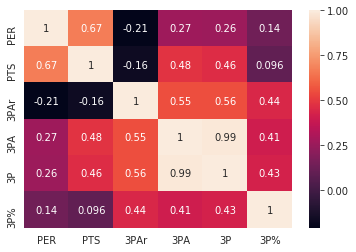

In [171]:
# Calculate pearson correlation using corr() function on select variables in the dataframe. 
nba1_corr = nba1.loc[:,["PER", "PTS", "3PAr", "3PA", "3P", "3P%"]]

# Plot heatmap of correlations
sns.heatmap(nba1_corr.corr(), annot=True)

#### Scatterplotsworks well for analyzing relationships between variables. Let's look at PTS per season vs. 3PA per season by position for 2017. Notice that there's not too much of a correlation between PTS and 3PA, aside fom a slightly positive correlation for PGs and SGs. Though, keep in mind, the positions PG and SG contain alot more 3PA observations than other other positions. 

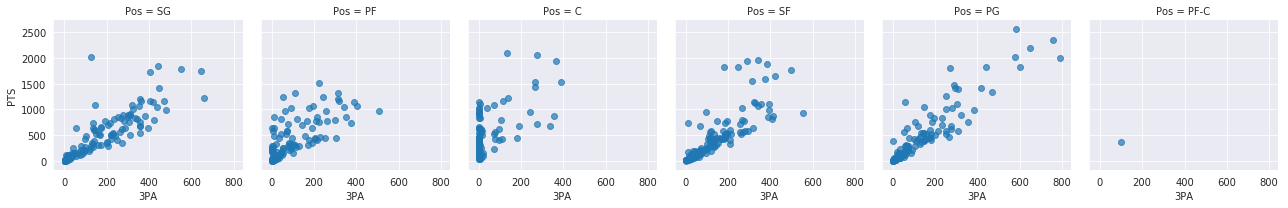

In [227]:
# Scatterplot of PTS vs. 3PA. Call FacetGrid() function and set col to "Pos" to view scatterplots by position side-by-side. 
# Set alpha argument to make dots slightly transparent. 

g=sns.FacetGrid(nba6, col = "Pos")
g.map(plt.scatter, "3PA", "PTS", alpha=0.7)